In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv('train_data.csv', encoding='utf-8', error_bad_lines=False)
df.head()

b'Skipping line 5856: expected 40 fields, saw 70\nSkipping line 7939: expected 40 fields, saw 49\n'


,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,VALTYPE,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA,New Georeferenced Column
0,1001791101,1,179,1101,NaN,155 FRANKLIN ST LLC,RK,4,0,0,...,AC-TR,MANHATTAN,40.719232,-74.008095,101.0,1.0,33.0,1002013.0,SoHo-TriBeCa-Civic Center-Little Italy,POINT (-74.008095 40.719232)
1,1000163436,1,16,3436,NaN,BROADLAR LLC,R4,2,0,0,...,AC-TR,MANHATTAN,40.709270,-74.016487,101.0,1.0,31704.0,1000053.0,Battery Park City-Lower Manhattan,POINT (-74.016487 40.70927)
2,1000761255,1,76,1255,NaN,"HAM, RICHARD",R4,2,0,0,...,AC-TR,MANHATTAN,40.708006,-74.006164,101.0,1.0,1502.0,1087867.0,Battery Park City-Lower Manhattan,POINT (-74.006164 40.708006)
3,1000161179,1,16,1179,NaN,"SHIM, HAE JIN",R4,2,0,0,...,AC-TR,MANHATTAN,40.709506,-74.018002,101.0,1.0,31704.0,1000061.0,Battery Park City-Lower Manhattan,POINT (-74.018002 40.709506)
4,1001751526,1,175,1526,NaN,BRIT GIRL LLC,R4,2,0,0,...,AC-TR,MANHATTAN,40.718024,-74.003903,101.0,1.0,33.0,1001937.0,SoHo-TriBeCa-Civic Center-Little Italy,POINT (-74.003903 40.718024)


In [32]:
length = len(df)
length

11946

BBLE -> 1.0 (11946 uniques) [1, 1, 1, 1, 1] [1, 1, 1, 1, 1]


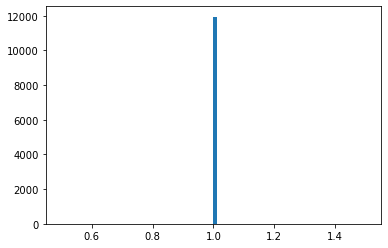

OWNER -> 0.9238238741001172 (11036 uniques) [71, 53, 34, 29, 22] [1, 1, 1, 1, 1]


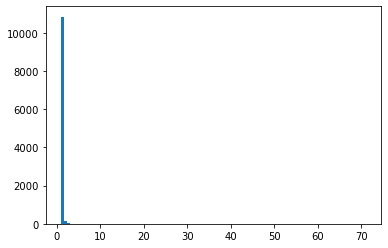

STADDR -> 0.8150008371002846 (9736 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


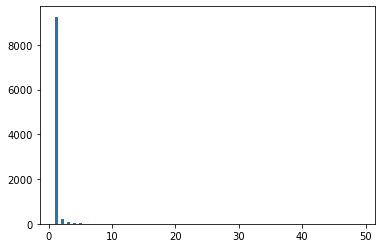

New Georeferenced Column -> 0.7874602377364809 (9407 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


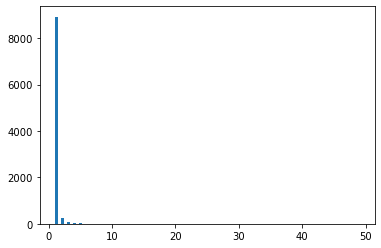

BIN -> 0.7701322618449691 (9200 uniques) [116, 49, 46, 43, 42] [1, 1, 1, 1, 1]


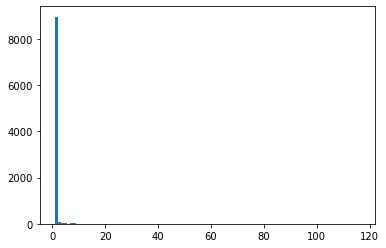

Latitude -> 0.7621798091411351 (9105 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


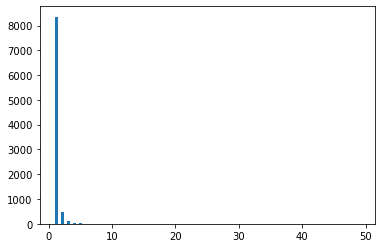

Longitude -> 0.7533902561526871 (9000 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


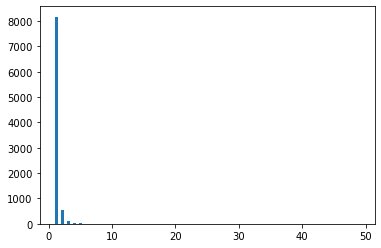

AVLAND -> 0.6347731458228696 (7583 uniques) [226, 26, 25, 21, 19] [1, 1, 1, 1, 1]


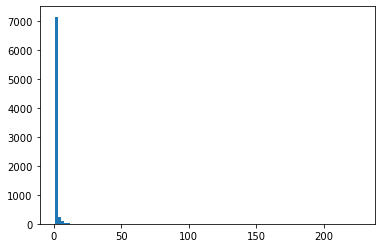

AVTOT -> 0.565796082370668 (6759 uniques) [226, 28, 27, 25, 24] [1, 1, 1, 1, 1]


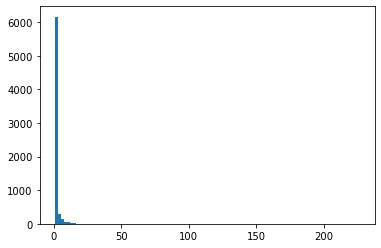

FULLVAL -> 0.39829231541938726 (4758 uniques) [226, 33, 29, 28, 26] [1, 1, 1, 1, 1]


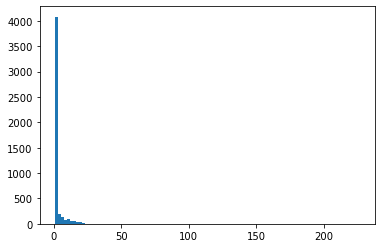

AVTOT2 -> 0.27473631341034654 (3282 uniques) [17, 15, 10, 9, 9] [1, 1, 1, 1, 1]


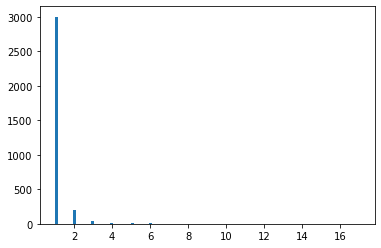

AVLAND2 -> 0.22970031809810815 (2744 uniques) [17, 17, 16, 16, 14] [1, 1, 1, 1, 1]


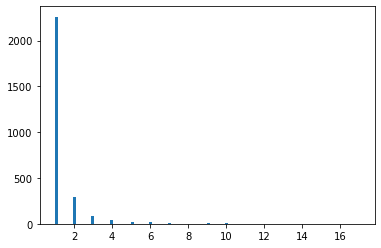

EXTOT -> 0.19387242591662482 (2316 uniques) [5953, 2365, 425, 261, 103] [1, 1, 1, 1, 1]


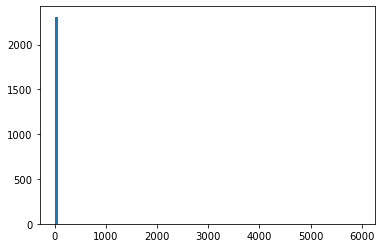

BLOCK -> 0.16993135777666166 (2030 uniques) [403, 380, 91, 79, 72] [1, 1, 1, 1, 1]


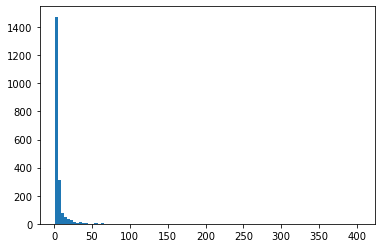

LOT -> 0.14557173949439142 (1739 uniques) [214, 121, 113, 112, 106] [1, 1, 1, 1, 1]


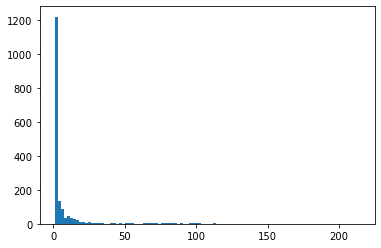

EXLAND -> 0.1392934873597857 (1664 uniques) [6733, 2200, 449, 208, 107] [1, 1, 1, 1, 1]


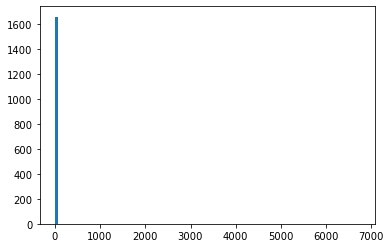

EXTOT2 -> 0.124644232379039 (1489 uniques) [79, 18, 15, 14, 12] [1, 1, 1, 1, 1]


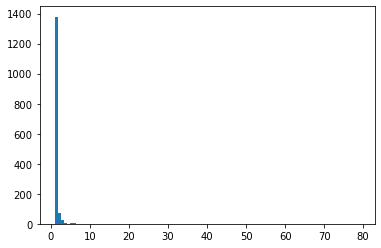

EXLAND2 -> 0.07575757575757576 (905 uniques) [88, 16, 15, 8, 5] [1, 1, 1, 1, 1]


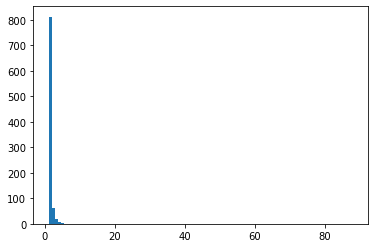

LTDEPTH -> 0.030219320274568893 (361 uniques) [3866, 2820, 250, 221, 212] [1, 1, 1, 1, 1]


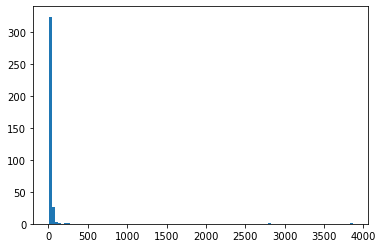

LTFRONT -> 0.028963669847647748 (346 uniques) [2425, 1049, 1030, 856, 353] [1, 1, 1, 1, 1]


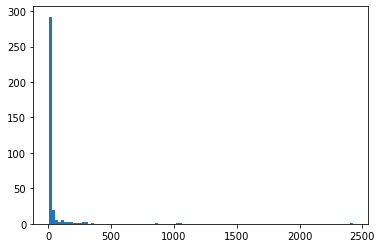

Census Tract -> 0.018667336346894357 (223 uniques) [585, 460, 429, 361, 358] [1, 1, 1, 1, 1]


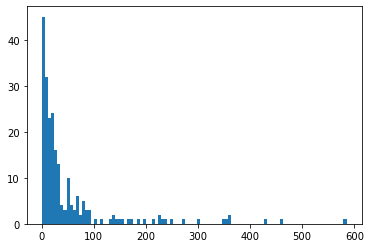

BLDFRONT -> 0.017997656119203082 (215 uniques) [3040, 1316, 764, 656, 619] [1, 1, 1, 1, 1]


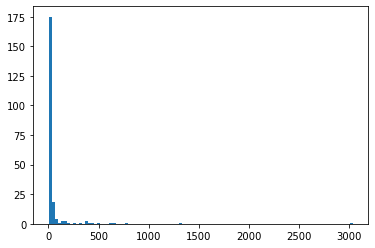

BLDDEPTH -> 0.01791394609074167 (214 uniques) [3031, 481, 427, 373, 370] [1, 1, 1, 1, 1]


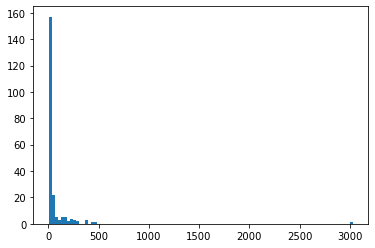

BLDGCL -> 0.0129750544115185 (155 uniques) [1877, 1290, 1162, 1031, 822] [1, 1, 1, 1, 1]


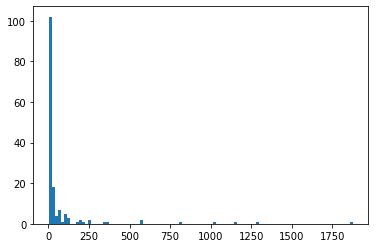

EXCD1 -> 0.005943412020760087 (71 uniques) [3352, 485, 400, 221, 219] [1, 1, 1, 1, 1]


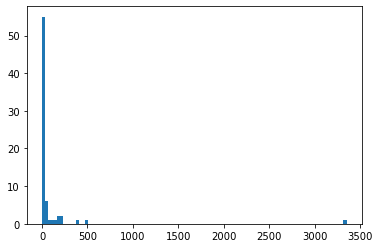

In [ ]:
l = [(column, df[column].nunique()) for column in df.columns]
l = reversed(sorted(l, key=lambda x: x[1]))
for x in l:
    cnt = list(reversed(sorted(df.groupby(x[0])['BBLE'].nunique())))
    print(x[0], '->', x[1] / length, f'({x[1]} uniques)', cnt[:5], cnt[-5:])
    plt.hist(cnt, bins=100)
    plt.show()

In [ ]:
df['YEAR'].dtype

In [ ]:
df['EXT']

In [ ]:
owner_cnt = df.groupby('OWNER')['BBLE'].nunique()
bin_cnt = df.groupby('BIN')['BBLE'].nunique()
census_cnt = df.groupby('Census Tract')['BBLE'].nunique()
bldgcl_cnt = df.groupby('BLDGCL')['BBLE'].nunique()
excd1_cnt = df.groupby('EXCD1')['BBLE'].nunique()
nta_cnt = df.groupby('NTA')['BBLE'].nunique()
community_board_cnt = df.groupby('Community Board')['BBLE'].nunique()
#excd2_cnt = df.groupby('EXCD2')['BBLE'].nunique()

In [ ]:
df['OWNER_RICHNESS'] = 'poor'
df['BIN_POPULARNESS'] = 'not popular'
df.loc[df['OWNER'].isin(owner_cnt[owner_cnt > 10].index), 'OWNER_RICHNESS'] = 'very rich'
df.loc[df['OWNER'].isin(owner_cnt[(owner_cnt > 1) & (owner_cnt <= 10)].index), 'OWNER_RICHNESS'] = 'rich'
df.loc[df['BIN'].isin(bin_cnt[bin_cnt > 10].index), 'BIN_POPULARNESS'] = 'very popular'
df.loc[df['BIN'].isin(bin_cnt[(bin_cnt > 1) & (bin_cnt <= 10)].index), 'BIN_POPULARNESS'] = 'popular'
df.loc[df['Census Tract'].isin(census_cnt[census_cnt <= 10].index), 'Census Tract'] = 'other category'
df.loc[df['Census Tract'] != 'other', 'Census Tract'] = df.loc[df['Census Tract'] != 'other', 'Census Tract'].astype(str) + ' category'
df.loc[df['BLDGCL'].isin(bldgcl_cnt[bldgcl_cnt <= 10].index), 'BLDGCL'] = 'OTHER_BUILDING_CLASS'
df.loc[df['EXCD1'].isin(excd1_cnt[excd1_cnt <= 10].index), 'EXCD1'] = 'other'
df.loc[df['EXCD1'] != 'other', 'EXCD1'] = df.loc[df['EXCD1'] != 'other', 'EXCD1'].astype(str) + 'category'
df.loc[df['NTA'].isin(nta_cnt[nta_cnt <= 10].index), 'NTA'] = 'OTHER_NTA'
df.loc[df['Community Board'].isin(community_board_cnt[community_board_cnt <= 10].index), 'Community Board'] = 'other'
df.loc[df['Community Board'] != 'other', 'Community Board'] = df.loc[df['Community Board'] != 'other', 'Community Board'].astype(str) + ' category'
df.loc[:, 'Council District'] = df.loc[:, 'Council District'].astype(str) + ' category'
#df.loc[df['EXCD2'].isin(excd2_cnt[excd2_cnt <= 10].index), 'EXCD2'] = 'other'
#df.loc[df['EXCD2'] != 'other', 'EXCD2'] = df.loc[df['EXCD2'] != 'other', 'EXCD2'].astype(str) + ' category'
df['TAXCLASS'] = df['TAXCLASS'].astype(str)


df.loc[df['EXTOT'] == 0, 'EXTOT'] = np.nan
df.loc[df['EXLAND'] == 0, 'EXLAND'] = np.nan
df.loc[df['LTDEPTH'] == 0, 'LTDEPTH'] = np.nan
df.loc[df['LTFRONT'] == 0, 'LTFRONT'] = np.nan
df.loc[df['BLDFRONT'] == 0, 'BLDFRONT'] = np.nan
df.loc[df['BLDDEPTH'] == 0, 'BLDDEPTH'] = np.nan

In [ ]:
df[['AVLAND', 'AVTOT', 'AVLAND2', 'AVTOT2', 'EXTOT', 'EXTOT2', 'EXLAND', 'EXLAND2']]

In [ ]:
df['Census Tract']

In [ ]:
df = df.drop(columns='BBLE') # indices (every unique)
df = df.drop(columns='VALTYPE') # only 1 unique values
df = df.drop(columns='OWNER') # Owner replaced by OWNER_RICHNESS (could also get sth from owner name)
df = df.drop(columns='STADDR') # Address not needed - we already use long. + lat.
df = df.drop(columns='New Georeferenced Column') # Point not needed - we already use long. + lat.
df = df.drop(columns='BIN') # BIN replaced by BIN_POPULARNESS, BIN probably not needed - we already use long. + lat.
#AVLAND and AVTOT - wazne wartosci liczbowe
#FULLVAL - y do przewidzenia
#AVLAND2  and AVTOT2 - wazne wartosci liczbowe
#EXTOT, EXTOT2, EXLAND and EXLAND2 - wazne wartosci liczbowe
df = df.drop(columns='BLOCK') # BLOCK not needed - we already use long. + lat.
df = df.drop(columns='LOT') # LOT number is used for taxes (either do some mapping to taxation or drop it)
# LTDEPTH and LTFRONT - chyba to wielkości posesji
# BLDFRONT, BLDDEPTH - wielkości budynku

# STORIES - liczba pięter
df = df.drop(columns='POSTCODE') # POSTCODE not needed - we already use long. + lat. 
# Community Board - kategoryczna zmienna 
# EXCD2 - exception code 2, kategoryczna zmienna
df = df.drop(columns='EXCD2') # EXCD2 not needed - too many nans.
df = df.drop(columns='EXMPTCL') # EXMPTCL not needed - too many nans.
df = df.drop(columns='EASEMENT') # fajny opis ale tylko 120 non-nan wiec out.
# Borough - dzielnica, kategoryczne
df = df.drop(columns='BORO') # PRAWIE to samo co Borough.
# EXT - Extension indicator, kategoryczne
df = df.drop(columns='PERIOD') # Tylko jedno unique value.

In [ ]:
df.to_csv('cleaned.csv', index=0)

In [ ]:
df = pd.read_csv('cleaned.csv')
df.head()

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in df.columns:
    mask = pd.isna(df[column])
    s = mask.sum()
    if s > 0:
        if column in numerical_columns:
            m = df[column].mean()
            if s > 10:
                df[str(column) + '_WAS_NAN'] = 0
                df.loc[mask, str(column) + '_WAS_NAN'] = 1
        else:
            m = 'nan_val'
        df[column] = df[column].fillna(m)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.to_csv('cleaned.csv', index=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(df[numerical_columns])
scaled = scaler.transform(df[numerical_columns])
df[numerical_columns] = scaled

In [ ]:
df.columns

In [ ]:
df['NTA']

In [ ]:
df.head()

In [ ]:
categorical_cols = ['BLDGCL', 'TAXCLASS', 'EXT', 'YEAR', 'Borough', 'Community Board', 'Council District',
                    'Census Tract', 'NTA', 'OWNER_RICHNESS', 'BIN_POPULARNESS', 'LTFRONT_WAS_NAN',
                    'LTDEPTH_WAS_NAN', 'STORIES_WAS_NAN', 'EXLAND_WAS_NAN', 'EXTOT_WAS_NAN',
                    'BLDFRONT_WAS_NAN', 'BLDDEPTH_WAS_NAN', 'AVLAND2_WAS_NAN',
                    'AVTOT2_WAS_NAN', 'EXLAND2_WAS_NAN', 'EXTOT2_WAS_NAN',
                    'Latitude_WAS_NAN', 'Longitude_WAS_NAN', 'EXCD1'
                   ]

In [ ]:
one_hot_encoded = pd.get_dummies(df[categorical_cols])
one_hot_encoded.head()

In [ ]:
df = df.drop(columns=categorical_cols)
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df.head()

In [ ]:
df.to_csv('processed.csv', index=0)

In [ ]:
df['LTAREA'] = df['LTDEPTH'] * df['LTFRONT']
df['BLDAREA'] = df['BLDDEPTH'] * df['BLDFRONT']

In [ ]:
df.to_csv('processed.csv', index=0)

In [ ]:
df.head()